<a href="https://colab.research.google.com/github/lyj12h/ai_m/blob/main/pre/temp_%EC%9B%90%EB%9E%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/pre/

/content/drive/MyDrive/pre


## 2021년도 데이터

파일 하나로 합치기

In [ ]:
#이미 했으니까 다시 하지 말기 !!
date = ['05.31-06.06', '06.07-06.13','06.14-06.20','06.21-06.27','06.28-07.04','07.05-07.11','07.12-07.18', '07.19-07.25','07.26-08.01','08.02-08.08','08.09-08.15','08.16-08.22','08.23-08.29','08.30-09.05']

# 빈 딕셔너리 생성
temp_data = {}

# 각 파일을 불러와서 딕셔너리에 저장
for temp in date:
    temp_data[temp] = pd.read_csv(f'2021_temp/S-DoT_NATURE_2021.{temp}.csv',encoding='CP949')

# 모든 데이터를 합치기
all_data = pd.concat(temp_data.values(), ignore_index=True)

# csv 파일로 저장
all_data.to_csv('combined_S-DoT_2021_data.csv', index=False)

In [ ]:
temp_data = {}

temp_data[0]=pd.read_csv(f'error_S-DoT_2021_june_data.csv',encoding='CP949')
temp_data[1]=pd.read_csv(f'error_S-DoT_2021_july_data.csv',encoding='CP949')
temp_data[2]=pd.read_csv(f'error_S-DoT_2021_aug_data.csv',encoding='CP949')
all_data = pd.concat(temp_data.values(), ignore_index=False)
all_data

,serial,error_pct
0,OC3CL200126,100.000000
1,OC3CL200143,5.545617
2,OC3CL200210,7.705779
3,OC3CL200227,100.000000
4,V02Q1940219,7.352941
...,...,...
23,V02Q1940848,5.067568
24,V02Q1940855,5.527638
25,V02Q1940884,5.115512
26,V02Q1940886,7.899160


In [ ]:
all_data.serial.unique()

array(['OC3CL200126', 'OC3CL200143', 'OC3CL200210', 'OC3CL200227',
       'V02Q1940219', 'V02Q1940247', 'V02Q1940261', 'V02Q1940316',
       'V02Q1940349', 'V02Q1940393', 'V02Q1940530', 'V02Q1940710',
       'V02Q1940716', 'V02Q1940720', 'V02Q1940751', 'V02Q1940796',
       'V02Q1940799', 'V02Q1940817', 'V02Q1940837', 'V02Q1940843',
       'V02Q1940886', 'OC3CL200013', 'OC3CL200025', 'OC3CL200104',
       'OC3CL200109', 'OC3CL200122', 'OC3CL200180', 'OC3CL200191',
       'OC3CL200196', 'V02Q1940225', 'V02Q1940266', 'V02Q1940394',
       'V02Q1940517', 'V02Q1940566', 'V02Q1940619', 'V02Q1940686',
       'V02Q1940756', 'V02Q1940798', 'V02Q1940844', 'V02Q1940854',
       'V02Q1940855', 'V02Q1940884', 'V02Q1940944', 'V02Q1941013',
       'OC3CL200026', 'OC3CL200113', 'OC3CL200116', 'OC3CL200151',
       'OC3CL200172', 'OC3CL200178', 'V02Q1940182', 'V02Q1940562',
       'V02Q1940788', 'V02Q1940848'], dtype=object)

In [ ]:
df_2021=pd.read_csv('combined_S-DoT_2021_data.csv',sep=',',usecols=[2,6,25],parse_dates=['등록일자'])
df_2021.head()

,시리얼,기온(℃),등록일자
0,OC3CL200010,17.1,2021-05-31 00:07:00
1,OC3CL200013,16.5,2021-05-31 00:07:00
2,OC3CL200015,16.8,2021-05-31 00:07:00
3,OC3CL200014,17.1,2021-05-31 00:07:00
4,OC3CL200028,16.5,2021-05-31 00:07:00


In [ ]:
df_2021.rename(columns = {'시리얼':'serial','기온(℃)' : 'temp','등록일자':'date_time'}, inplace = True)

1. 모든 파일에 대해 가져와야함
2. 필요한 6~9월만 선택하고 합친 데이터를 하나 만들어야함

--- 결측치와 이상치 확인 -40 이런 애 체크하기 ---
3. 만들고나면 s-dot 정보와 join해서 s-dot 정보에 있는 시리얼만 남기기 left join?
4. 일평균 항목을 만든다
5. 월평균 항목을 만든다

-> 일단 위 과정을 함수로 만들어야할듯 월 선택하는거까지

### 6월 데이터

In [ ]:
df_2021\
    .rename(dict(value='temp'), axis=1)\
    .groupby('serial')
    .assign(
        total_prcp_in_month=lambda x: \
            x.groupby(pd.Grouper(freq='M')).transform(np.sum),
				total_day_in_month=lambda x: \
						x.groupby(pd.Grouper(freq='M')).transform(np.count),
        pct_monthly_prcp=lambda x: \
            x.prcp.div(x.total_prcp_in_month)
    )\
    .nlargest(5, 'pct_monthly_prcp')


In [ ]:
check_df_june=pd.merge(df_2021_june,check_2021_june,how='outer',indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
df_june=check_df_june.groupby('serial')['temp'].mean().to_frame()
df_june.rename(columns={'temp':'June_AVG_temp'},inplace=True)
df_june.to_csv('S-DoT_2021_june_data.csv', index=True)

In [ ]:
df_2021.nunique()

serial       1099
temp          413
date_time    2474
dtype: int64

In [ ]:
#6월 데이터 분류
df_2021_june = df_2021[df_2021['date_time'].between('2021-06-01', '2021-07-01')]
df_2021_june

,serial,temp,date_time
25321,OC3CL200014,20.9,2021-06-01 00:07:00
25322,OC3CL200012,21.1,2021-06-01 00:07:00
25323,OC3CL200010,16.9,2021-06-01 00:07:00
25324,OC3CL200011,21.6,2021-06-01 00:07:00
25325,OC3CL200015,20.3,2021-06-01 00:07:00
...,...,...,...
661540,V02Q1940955,25.8,2021-06-30 23:07:00
661541,V02Q1941013,26.3,2021-06-30 23:07:00
661542,V02Q1941006,25.5,2021-06-30 23:07:00
661543,V02Q1941015,26.7,2021-06-30 23:07:00


In [ ]:
#6월 데이터의 결측치 확인
df_2021_june.isnull().sum()

serial         0
temp         303
humudity     303
date_time      0
dtype: int64

In [ ]:
df_2021_june.describe()

,temp,humudity
count,635921.000000,635921.000000
mean,24.280307,68.000549
std,3.644943,15.574913
min,-40.000000,0.000000
25%,21.800000,57.000000
50%,23.900000,69.000000
75%,26.700000,79.000000
max,40.400000,100.000000


In [ ]:
#시리얼 갯수
n1=df_2021_june['serial'].nunique()
n2=df_2021_july['serial'].nunique()
n3=df_2021_aug['serial'].nunique()
print(n1,n2,n3)

1092 1097 1098


In [ ]:
df_2021_june.loc[(df_2021_june.serial=='OC3CL200126')] #1시간 단위였음 알고보니

,serial,temp,humudity,date_time
340887,OC3CL200126,NaN,NaN,2021-06-18 15:07:00


In [ ]:
#높은 온도 이상한 값 확인
check_high_june=df_2021_june.sort_values('temp',ascending=False)
high=check_high_june.iloc[:int(len(check_high_june)*0.01)]
high

,serial,temp,date_time
575093,V02Q1940247,40.4,2021-06-27 16:07:00
575681,V02Q1940843,39.5,2021-06-27 16:07:00
297664,V02Q1940247,39.5,2021-06-16 19:07:00
149650,V02Q1940247,39.3,2021-06-09 17:07:00
296126,V02Q1940247,39.2,2021-06-16 17:07:00
...,...,...,...
248669,V02Q1940487,32.7,2021-06-14 14:07:00
66784,V02Q1940650,32.7,2021-06-02 16:07:00
65630,V02Q1940416,32.7,2021-06-02 15:07:00
228169,V02Q1940487,32.7,2021-06-13 13:07:00


In [ ]:
check_low=df_2021_june.loc[(df_2021_june.temp<13.3)&df_2021['date_time'].between('2021-06-01', '2021-06-05')].sort_values('temp',ascending=True)
check_low_june=check_low.iloc[:int(len(check_low)*0.01)]
check_low_june

,serial,temp,date_time
102030,OC3CL200255,10.1,2021-06-04 04:07:00
103104,OC3CL200255,10.2,2021-06-04 05:07:00
102034,OC3CL200213,10.6,2021-06-04 04:07:00


In [ ]:
#낮은 온도 및 nan 데이터 확인
low_june=df_2021_june.loc[(df_2021_june.temp<10)|(df_2021_june.temp.isnull())]
low=pd.concat([low_june,check_low_june],axis=0,join='outer')
low

,serial,temp,date_time
340887,OC3CL200126,NaN,2021-06-18 15:07:00
361267,V02Q1940935,NaN,2021-06-19 09:07:00
362365,V02Q1940935,NaN,2021-06-19 10:07:00
386027,V02Q1940824,NaN,2021-06-20 08:07:00
387100,V02Q1940824,NaN,2021-06-20 09:07:00
...,...,...,...
660668,OC3CL200227,NaN,2021-06-30 23:07:00
661168,V02Q1940530,NaN,2021-06-30 23:07:00
102030,OC3CL200255,10.1,2021-06-04 04:07:00
103104,OC3CL200255,10.2,2021-06-04 05:07:00


In [ ]:
#위에 2 df 합치기
check_2021_june=pd.concat([high,low],axis=0,join='outer')
check_2021_june.sort_values('temp',ascending=False)

,serial,temp,date_time
575093,V02Q1940247,40.4,2021-06-27 16:07:00
297664,V02Q1940247,39.5,2021-06-16 19:07:00
575681,V02Q1940843,39.5,2021-06-27 16:07:00
149650,V02Q1940247,39.3,2021-06-09 17:07:00
296126,V02Q1940247,39.2,2021-06-16 17:07:00
...,...,...,...
658996,V02Q1940530,NaN,2021-06-30 21:07:00
659582,OC3CL200227,NaN,2021-06-30 22:07:00
660083,V02Q1940530,NaN,2021-06-30 22:07:00
660668,OC3CL200227,NaN,2021-06-30 23:07:00


In [ ]:
# 체크해야하는 데이터들 중에 serial 빈도를 살펴보고 싶음 serial로 classification 해야하는거지
# station 별로 conunt
check_2021_june.groupby('serial').date_time.count()

serial
OC3CL200012    14
OC3CL200013    26
OC3CL200015     1
OC3CL200016     1
OC3CL200017     2
               ..
V02Q1940955     4
V02Q1941000    16
V02Q1941006     6
V02Q1941013    25
V02Q1941015     2
Name: date_time, Length: 911, dtype: int64

In [ ]:
#이상한 값 제거한 6월 데이터
check_df_june=pd.merge(df_2021_june,check_2021_june,how='outer',indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
df_june=check_df_june.groupby('serial')['temp'].mean().to_frame()
df_june.rename(columns={'temp':'June_AVG_temp'},inplace=True)
df_june.to_csv('S-DoT_2021_june_data.csv', index=True)

In [ ]:
df_2021_june_1=pd.read_csv('S-DoT_2021_june_data.csv')
df_2021_july_1=pd.read_csv('S-DoT_2021_july_data.csv')
df_2021_aug_1=pd.read_csv('S-DoT_2021_aug_data.csv')
df_2021_july_1.describe()

,July_AVG_temp
count,1097.000000
mean,29.275562
std,0.888271
min,21.600000
25%,28.856564
50%,29.513268
75%,29.834685
max,32.411111


In [ ]:
#빼야할 시리얼 선택 5%
pct=check_2021_june.groupby('serial').date_time.count()/df_2021_june.groupby('serial').date_time.count()*100
pct=pct.to_frame()
pct.rename(columns={'date_time':'error_pct'},inplace=True)
new_pct=pct.fillna(0)
new_pct.describe()

error_serial_june=new_pct.loc[(new_pct.error_pct>=5)]
error_serial_june

,error_pct
serial,
OC3CL200126,100.000000
OC3CL200143,5.545617
OC3CL200210,7.705779
OC3CL200227,100.000000
V02Q1940219,7.352941
V02Q1940247,5.843072
V02Q1940261,5.228758
V02Q1940316,5.378151
V02Q1940349,6.666667


In [ ]:
new_pct.describe()

,error_pct
count,1092.000000
mean,1.234322
std,4.719563
min,0.000000
25%,0.332779
50%,0.684346
75%,1.324503
max,100.000000


In [ ]:
#6월 관측치 중 5% 이상의 이상치를 가진 시리얼 넘버 내보내기
error_serial_june.to_csv('error_S-DoT_2021_june_data.csv', index=True)

### 7월 데이터

In [ ]:
#7월 데이터 분류
df_2021_july = df_2021[df_2021['date_time'].between('2021-07-01', '2021-08-01')]
df_2021_july

,serial,temp,date_time
661545,OC3CL200011,21.6,2021-07-01 00:07:00
661546,OC3CL200010,21.1,2021-07-01 00:07:00
661547,OC3CL200012,25.5,2021-07-01 00:07:00
661548,OC3CL200014,25.5,2021-07-01 00:07:00
661549,OC3CL200015,25.1,2021-07-01 00:07:00
...,...,...,...
1441213,V02Q1941006,29.4,2021-07-31 23:07:00
1441214,V02Q1941000,30.2,2021-07-31 23:07:00
1441215,V02Q1940955,29.4,2021-07-31 23:07:00
1441216,V02Q1941015,29.8,2021-07-31 23:07:00


In [ ]:
df_2021_july.describe()

,temp,humudity
count,779581.000000,779581.000000
mean,29.222916,67.055718
std,5.239264,16.245513
min,-40.000000,0.000000
25%,26.400000,56.000000
50%,29.300000,66.000000
75%,32.200000,78.000000
max,72.000000,100.000000


In [ ]:
# 19.6
#높은 온도 :
check_high_july=df_2021_july.sort_values('temp',ascending=False)
high=check_high_july.iloc[:int(len(check_high_july)*0.01)]
high

,serial,temp,date_time
1137712,OC3CL200210,72.0,2021-07-20 08:07:00
1133367,OC3CL200210,69.5,2021-07-20 04:07:00
1132279,OC3CL200210,66.7,2021-07-20 03:07:00
1138800,OC3CL200210,65.9,2021-07-20 09:07:00
1251343,V02Q1940247,47.5,2021-07-24 17:07:00
...,...,...,...
1407189,V02Q1940517,38.3,2021-07-30 16:07:00
1406947,V02Q1940261,38.3,2021-07-30 16:07:00
1225712,V02Q1940793,38.3,2021-07-23 17:07:00
1198951,V02Q1940178,38.3,2021-07-22 17:07:00


In [ ]:
check_low=df_2021_july.loc[(df_2021_july.temp<19.6)&(df_2021_july.temp>17)]
check_low.sort_values('temp',ascending=True)

,serial,temp,date_time
737726,OC3CL200154,17.6,2021-07-03 22:07:00
738804,OC3CL200154,17.6,2021-07-03 23:07:00
771052,OC3CL200154,17.8,2021-07-05 05:07:00
772126,OC3CL200154,17.8,2021-07-05 06:07:00
736640,OC3CL200154,17.8,2021-07-03 21:07:00
...,...,...,...
737789,OC3CL200227,19.5,2021-07-03 22:07:00
737788,OC3CL200216,19.5,2021-07-03 22:07:00
737785,OC3CL200217,19.5,2021-07-03 22:07:00
738048,V02Q1940286,19.5,2021-07-03 22:07:00


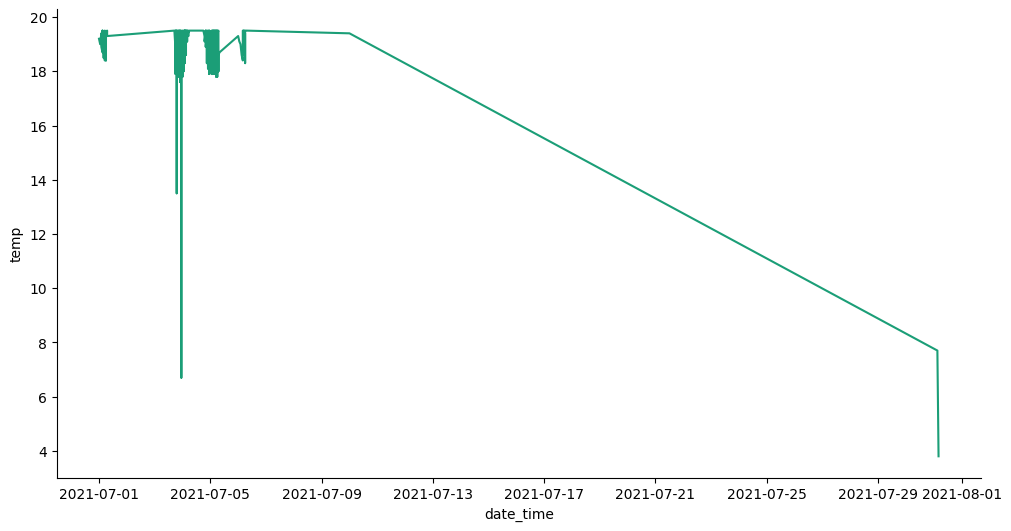

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_time']
  ys = series['temp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_44.sort_values('date_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_time')
_ = plt.ylabel('temp')

In [ ]:
check_low=df_2021_july.loc[(df_2021_july.temp<19.6)&(df_2021_july.temp>17)].sort_values('temp',ascending=True)
check_low_july=check_low.iloc[:int(len(check_low)*0.01)]

low_july=df_2021_july.loc[(df_2021_july.temp<17)|(df_2021_july.temp.isnull())]
low=pd.concat([low_july,check_low_july],axis=0,join='outer')
low

,serial,temp,date_time
661756,OC3CL200227,NaN,2021-07-01 00:07:00
662253,V02Q1940530,NaN,2021-07-01 00:07:00
662838,OC3CL200227,NaN,2021-07-01 01:07:00
663334,V02Q1940530,NaN,2021-07-01 01:07:00
663923,OC3CL200227,NaN,2021-07-01 02:07:00
...,...,...,...
736640,OC3CL200154,17.8,2021-07-03 21:07:00
739889,OC3CL200154,17.8,2021-07-04 00:07:00
767831,OC3CL200154,17.9,2021-07-05 02:07:00
764625,OC3CL200154,17.9,2021-07-04 23:07:00


In [ ]:
#이상치 합치기
check_2021_july=pd.concat([high,low],axis=0,join='outer')
check_2021_july.sort_values('temp',ascending=False)

,serial,temp,date_time
1137712,OC3CL200210,72.0,2021-07-20 08:07:00
1133367,OC3CL200210,69.5,2021-07-20 04:07:00
1132279,OC3CL200210,66.7,2021-07-20 03:07:00
1138800,OC3CL200210,65.9,2021-07-20 09:07:00
1251343,V02Q1940247,47.5,2021-07-24 17:07:00
...,...,...,...
1279112,V02Q1940756,NaN,2021-07-25 18:07:00
1280191,V02Q1940756,NaN,2021-07-25 19:07:00
1281272,V02Q1940756,NaN,2021-07-25 20:07:00
1282373,V02Q1940756,NaN,2021-07-25 21:07:00


In [ ]:
#이상치를 제거한 7월 시리얼 별 월평균
check_df_july=pd.merge(df_2021_july,check_2021_july,how='outer',indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
df_july=check_df_july.groupby('serial')['temp'].mean().to_frame()
df_july.rename(columns={'temp':'July_AVG_temp'},inplace=True)
df_july.to_csv('S-DoT_2021_july_data.csv', index=True)

In [ ]:
pct=check_2021_july.groupby('serial').date_time.count()/df_2021_july.groupby('serial').date_time.count()*100
pct=pct.to_frame()
pct.rename(columns={'date_time':'error_pct'},inplace=True)
new_pct=pct.fillna(0)
new_pct.describe()

error_serial_july=new_pct.loc[(new_pct.error_pct>=5)]
error_serial_july.to_csv('error_S-DoT_2021_july_data.csv', index=True)

### 8월 데이터

In [ ]:
#8월 데이터 분류
df_2021_aug = df_2021[df_2021['date_time'].between('2021-08-01', '2021-09-01')]
df_2021_aug.describe()

,temp
count,620778.000000
mean,27.108626
std,5.269734
min,-40.000000
25%,24.800000
50%,27.100000
75%,29.700000
max,42.100000


In [ ]:
df_2021_aug.isnull().sum()

serial         0
temp         358
humudity     358
date_time      0
dtype: int64

In [ ]:
#높은 온도
check_high_aug=df_2021_aug.sort_values('temp',ascending=False)
check_high_aug
high=check_high_aug.iloc[:int(len(check_high_aug)*0.01)]
high

,serial,temp,date_time
1834315,V02Q1940247,42.1,2021-08-19 17:07:00
1782731,V02Q1940886,41.2,2021-08-15 17:07:00
1665291,V02Q1940886,40.8,2021-08-09 16:07:00
1562934,V02Q1940219,40.5,2021-08-05 16:07:00
1664657,V02Q1940247,40.2,2021-08-09 16:07:00
...,...,...,...
1664648,V02Q1940243,35.1,2021-08-09 16:07:00
1587042,V02Q1940775,35.1,2021-08-06 14:07:00
1562827,V02Q1940107,35.1,2021-08-05 16:07:00
1536229,V02Q1940531,35.1,2021-08-04 15:07:00


In [ ]:
#낮은 온도
df_2021_aug.loc[(df_2021_aug.temp<18.1)&(df_2021_aug.temp>0)].sort_values('temp',ascending=True)

check_low=df_2021_aug.loc[(df_2021_aug.temp<18.1)&(df_2021_aug.temp>17)].sort_values('temp',ascending=True)
check_low.head(10)

,serial,temp,date_time
2060376,OC3CL200143,17.1,2021-08-31 16:07:00
2061527,OC3CL200214,17.1,2021-08-31 17:07:00
1822346,OC3CL200061,17.1,2021-08-19 05:07:00
2061394,OC3CL200065,17.1,2021-08-31 17:07:00
2061405,OC3CL200075,17.2,2021-08-31 17:07:00
2061490,OC3CL200164,17.2,2021-08-31 17:07:00
2060489,OC3CL200255,17.2,2021-08-31 16:07:00
2061472,OC3CL200146,17.2,2021-08-31 17:07:00
2061412,OC3CL200072,17.2,2021-08-31 17:07:00
2061499,OC3CL200169,17.2,2021-08-31 17:07:00


In [ ]:
check_low=df_2021_aug.loc[(df_2021_aug.temp<18.1)&(df_2021_aug.temp>17)].sort_values('temp',ascending=True)
check_low_aug=check_low.iloc[:int(len(check_low)*0.01)]

low_aug=df_2021_aug.loc[(df_2021_aug.temp<17)|(df_2021_aug.temp.isnull())]
low=pd.concat([low_aug,check_low_aug],axis=0,join='outer')
low

,serial,temp,date_time
1441232,OC3CL200025,-40.0,2021-08-01 00:07:00
1441314,OC3CL200109,-40.0,2021-08-01 00:07:00
1441391,OC3CL200180,-40.0,2021-08-01 00:07:00
1441411,OC3CL200210,-40.0,2021-08-01 00:07:00
1442317,OC3CL200025,-40.0,2021-08-01 01:07:00
...,...,...,...
2061480,OC3CL200151,-40.0,2021-08-31 17:07:00
2061481,OC3CL200154,16.6,2021-08-31 17:07:00
2062226,V02Q1940788,NaN,2021-08-31 17:07:00
2060376,OC3CL200143,17.1,2021-08-31 16:07:00


In [ ]:
check_2021_aug=pd.concat([high,low],axis=0,join='outer')

8월 평균

In [ ]:
#8월 평균
check_2021_aug=pd.concat([high,low],axis=0,join='outer')

check_df_aug=pd.merge(df_2021_aug,check_2021_aug,how='outer',indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])
df_aug=check_df_aug.groupby('serial')['temp'].mean().to_frame()
df_aug.rename(columns={'temp':'aug_AVG_temp'},inplace=True)
df_aug.to_csv('S-DoT_2021_aug_data.csv', index=True)
df_aug.describe()

,aug_AVG_temp
count,1098.000000
mean,27.257475
std,0.822480
min,21.600000
25%,26.843167
50%,27.497793
75%,27.807248
max,29.097694


In [ ]:
#시리얼 확인
pct=check_2021_aug.groupby('serial').date_time.count()/df_2021_aug.groupby('serial').date_time.count()*100
pct=pct.to_frame()
pct.rename(columns={'date_time':'error_pct'},inplace=True)
new_pct=pct.fillna(0)
new_pct.describe()

error_serial_aug=new_pct.loc[(new_pct.error_pct>=5)]
error_serial_aug.to_csv('error_S-DoT_2021_aug_data.csv', index=True)

In [ ]:
error_serial_aug

,error_pct
serial,
OC3CL200025,83.005367
OC3CL200026,14.466546
OC3CL200104,6.469501
OC3CL200109,25.235405
OC3CL200113,25.211506
OC3CL200116,28.869565
OC3CL200151,96.509240
OC3CL200172,53.989813
OC3CL200178,30.742049


### 제거해야할 시리얼 확인

In [ ]:
#시리얼 갯수
n1=df_2021_june['serial'].nunique()
n2=df_2021_july['serial'].nunique()
n3=df_2021_aug['serial'].nunique()
print(n1,n2,n3)

1092 1097 1098


In [ ]:
n1=error_serial_june['error_pct'].nunique()
n2=error_serial_july['error_pct'].nunique()
n3=error_serial_aug['error_pct'].nunique()
print(n1,n2,n3)

20 34 28


##2022년도 데이터

In [ ]:
df=pd.read_csv('2022_temp/S-DoT_NATURE_2022.05.30-06.05.csv',encoding='CP949',sep=',',usecols=[2,6,7,14,25],parse_dates=['등록일자'])

df.head()

시리얼  기온(℃)  상대습도( %)  소음(dB)                등록일자
서울시 SDOT001  OC3CL200010   18.5     100.0    38.0 2022-05-30 00:07:01
    SDOT001  OC3CL200012   22.8      60.0    63.0 2022-05-30 00:07:01
    SDOT001  OC3CL200011    NaN       NaN    46.0 2022-05-30 00:07:01
    SDOT001  OC3CL200020   21.7      89.0    67.0 2022-05-30 00:07:01
    SDOT001  OC3CL200026   20.2      83.0    60.0 2022-05-30 00:07:01

In [ ]:
df.describe()

,기온(℃),상대습도( %),소음(dB)
count,164578.000000,164578.000000,163958.000000
mean,23.023235,53.663327,48.714896
std,7.831524,17.280286,7.868463
min,-40.000000,11.000000,35.000000
25%,21.100000,44.000000,43.000000
50%,23.500000,53.000000,47.000000
75%,26.400000,66.000000,53.000000
max,38.100000,100.000000,81.000000


In [ ]:
df.dtypes

시리얼                 object
기온(℃)              float64
상대습도( %)           float64
소음(dB)             float64
등록일자        datetime64[ns]
dtype: object

In [ ]:
df['datetime_m'] = df['등록일자'].dt.strftime('%Y-%m-%d')
df.head()


시리얼  기온(℃)  상대습도( %)  소음(dB)                등록일자  \
서울시 SDOT001  OC3CL200010   18.5     100.0    38.0 2022-05-30 00:07:01   
    SDOT001  OC3CL200012   22.8      60.0    63.0 2022-05-30 00:07:01   
    SDOT001  OC3CL200011    NaN       NaN    46.0 2022-05-30 00:07:01   
    SDOT001  OC3CL200020   21.7      89.0    67.0 2022-05-30 00:07:01   
    SDOT001  OC3CL200026   20.2      83.0    60.0 2022-05-30 00:07:01   

             datetime_m  
서울시 SDOT001  2022-05-30  
    SDOT001  2022-05-30  
    SDOT001  2022-05-30  
    SDOT001  2022-05-30  
    SDOT001  2022-05-30

In [ ]:
dataset_filtered = df[df['등록일자'].between('2022-06-01', '2022-06-06')]
dataset_filtered

시리얼  기온(℃)  상대습도( %)  소음(dB)                등록일자  \
서울시 SDOT001  OC3CL200020   21.0      36.0    69.0 2022-06-01 00:07:00   
    SDOT001  OC3CL200022   21.2      31.0    66.0 2022-06-01 00:07:00   
    SDOT001  OC3CL200019   20.4      37.0    59.0 2022-06-01 00:07:00   
    SDOT001  OC3CL200016   21.7      34.0    51.0 2022-06-01 00:07:00   
    SDOT001  OC3CL200013   17.9      45.0    48.0 2022-06-01 00:07:00   
...                  ...    ...       ...     ...                 ...   
    SDOT001  V02Q1940946   21.5      64.0    44.0 2022-06-05 23:07:57   
    SDOT001  V02Q1940948   21.9      63.0    41.0 2022-06-05 23:07:57   
    SDOT001  V02Q1940952   21.5      65.0    39.0 2022-06-05 23:07:57   
    SDOT001  V02Q1940944   21.3      68.0    44.0 2022-06-05 23:07:57   
    SDOT001  V02Q1940945   21.9      64.0    44.0 2022-06-05 23:07:57   

             datetime_m  
서울시 SDOT001  2022-06-01  
    SDOT001  2022-06-01  
    SDOT001  2022-06-01  
    SDOT001  2022-06-01  
    SDOT001  2022-06-01  
...                 ...  
    SDOT001  2022-06-05  
    SDOT001  2022-06-05  
    SDOT001  2022-06-05  
    SDOT001  2022-06-05  
    SDOT001  2022-06-05  

[117653 rows x 6 columns]